# Multiscale_Data_Mining
## HW04_Lec06_Model_Selection
### 2021020706 Soo Jeong Kim

1. Regenerate the result of the table on page 13 of the lecture note 06. Please use the attached "auto.csv". Because of the randomness when spliting the data set, the detail values might be different. 
2. Regenerate the result of the table on page 20 of the lecture note 06. The detail values can be different.
3. Repeat the problem 1 and 2 using KNN model by changing K. What is the optimal K from the model selection process?

In [734]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [735]:
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [736]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [737]:
auto = pd.read_csv("./auto.csv")
auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,US
1,15.0,8,350.0,165,3693,11.5,70,US
2,18.0,8,318.0,150,3436,11.0,70,US
3,16.0,8,304.0,150,3433,12.0,70,US
4,17.0,8,302.0,140,3449,10.5,70,US


In [738]:
X = auto.iloc[:,3:4].values
y = auto.iloc[:,0].values

In [739]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0)

In [740]:
X_train.shape, y_train.shape

((258, 1), (258,))

In [741]:
X_test.shape, y_test.shape

((134, 1), (134,))

In [742]:
table_MSE_13 = pd.DataFrame(data = [["" for _ in range(4)] for _ in range(5)], columns=["1st", "2nd", "3rd", "4th"],
                         index=["Train MSE", "Validation MSE", "LOOCV MSE", "5-fold CV MSE", "Test MSE"])

In [743]:
idx_shuffle = np.random.permutation(auto.shape[0])
auto = auto.iloc[idx_shuffle, :]
auto.index = np.arange(auto.shape[0])
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,16.0,6,250.0,100,3781,17.0,74,US
1,26.5,4,140.0,72,2565,13.6,76,US
2,23.2,4,156.0,105,2745,16.7,78,US
3,16.9,8,350.0,155,4360,14.9,79,US
4,17.7,6,231.0,165,3445,13.4,78,US
...,...,...,...,...,...,...,...,...
387,36.0,4,107.0,75,2205,14.5,82,JP
388,35.0,4,122.0,88,2500,15.1,80,EU
389,25.0,4,113.0,95,2228,14.0,71,JP
390,16.0,8,351.0,149,4335,14.5,77,US


# Train set approach

In [744]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
#1st model 
MSE = mean_squared_error(y_test, pred)
table_MSE_13.loc["Train MSE", table_MSE_13.columns[0]]=MSE

from sklearn.preprocessing import PolynomialFeatures
#Quadratic (2nd model)
poly_reg = PolynomialFeatures(degree = 2)
X_train2 = poly_reg.fit_transform(X_train)
X_test2 = poly_reg.fit_transform(X_test)

lin_reg2=LinearRegression()
model = lin_reg2.fit(X_train2,y_train)
table_MSE_13.loc["Train MSE", table_MSE_13.columns[1]]=mean_squared_error(y_test, model.predict(X_test2))

#Cubic
poly_reg = PolynomialFeatures(degree = 3)
X_train3 = poly_reg.fit_transform(X_train)
X_test3 = poly_reg.fit_transform(X_test)

lin_reg3=LinearRegression()
model = lin_reg3.fit(X_train3,y_train)
table_MSE_13.loc["Train MSE", table_MSE_13.columns[2]]=mean_squared_error(y_test, model.predict(X_test3))

#Quartic
poly_reg = PolynomialFeatures(degree = 4)
X_train4 = poly_reg.fit_transform(X_train)
X_test4 = poly_reg.fit_transform(X_test)

lin_reg4=LinearRegression()
model = lin_reg4.fit(X_train4,y_train)
table_MSE_13.loc["Train MSE", table_MSE_13.columns[3]]=mean_squared_error(y_test, model.predict(X_test4))

table_MSE_13

,1st,2nd,3rd,4th
Train MSE,24.197,19.0443,19.0792,18.9584
Validation MSE,,,,
LOOCV MSE,,,,
5-fold CV MSE,,,,
Test MSE,,,,


# Validation set approach

In [745]:
train_df = auto.sample(196, random_state = 2)
test_df = auto[~auto.isin(train_df)].dropna(how = 'all')

X_train = train_df['horsepower'].values.reshape(-1,1)
y_train = train_df['mpg']
X_test = test_df['horsepower'].values.reshape(-1,1)
y_test = test_df['mpg']

# Linear
model = lin_reg.fit(X_train, y_train)
table_MSE_13.loc["Validation MSE", table_MSE_13.columns[0]]=mean_squared_error(y_test, model.predict(X_test))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = lin_reg.fit(X_train2, y_train)
table_MSE_13.loc["Validation MSE", table_MSE_13.columns[1]]=mean_squared_error(y_test, model.predict(X_test2))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = lin_reg.fit(X_train3, y_train)
table_MSE_13.loc["Validation MSE", table_MSE_13.columns[2]]=mean_squared_error(y_test, model.predict(X_test3))

#Quartic
poly_reg = PolynomialFeatures(degree = 4)
X_train4 = poly_reg.fit_transform(X_train)
X_test4 = poly_reg.fit_transform(X_test)

lin_reg4=LinearRegression()
model = lin_reg4.fit(X_train4,y_train)
table_MSE_13.loc["Validation MSE", table_MSE_13.columns[3]]=mean_squared_error(y_test, model.predict(X_test4))

table_MSE_13

,1st,2nd,3rd,4th
Train MSE,24.197,19.0443,19.0792,18.9584
Validation MSE,23.8246,18.4068,18.5398,18.895
LOOCV MSE,,,,
5-fold CV MSE,,,,
Test MSE,,,,


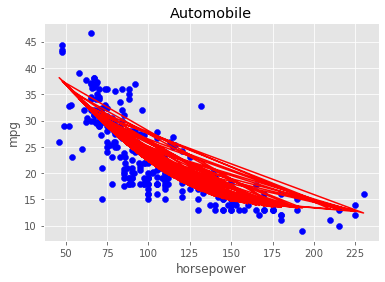

In [191]:
# Visualising the Polynomial Regression results
plt.scatter(X_train, y_train, color = 'blue')
 
plt.plot(X_train, lin_reg2.predict(poly_reg.fit_transform(X_train)), color = 'red')
plt.title('Automobile')
plt.xlabel('horsepower')
plt.ylabel('mpg')
 
plt.show()

# Leave-One-Out Cross-Validation(LOOCV)

In [747]:
model = lin_reg.fit(X_train, y_train)
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loo = LeaveOneOut()
X = auto['horsepower'].values.reshape(-1,1)
y = auto['mpg'].values.reshape(-1,1)
loo.get_n_splits(X)

from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Folds: 392, MSE: 24.23151351792923, STD: 36.79731503640535


Our cross-validation estimate for the test error is approximately 24.23. We can repeat this procedure for increasingly complex polynomial fits. To automate the process, we use the for() function to initiate a for loop which iteratively fits polynomial regressions for polynomials of order i = 1 to i = 4 and computes the associated cross-validation error.

In [748]:
for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lin_reg.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
    table_MSE_13.loc["LOOCV MSE", table_MSE_13.columns[i-1]] = np.mean(np.abs(scores))
table_MSE_13

Degree-1 polynomial MSE: 24.231513517929226, STD: 36.797315036405344
Degree-2 polynomial MSE: 19.248213124489297, STD: 34.998446151781856
Degree-3 polynomial MSE: 19.334984064052662, STD: 35.76513567800905
Degree-4 polynomial MSE: 19.4244303105653, STD: 35.683352762156495


,1st,2nd,3rd,4th
Train MSE,24.197,19.0443,19.0792,18.9584
Validation MSE,23.8246,18.4068,18.5398,18.895
LOOCV MSE,24.2315,19.2482,19.335,19.4244
5-fold CV MSE,,,,
Test MSE,,,,


Here we see a sharp drop in the estimated test MSE between the linear and quadratic fits, but then no clear improvement from using higher-order polynomials.

# 5-Fold Cross-Validation

In [749]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=True)

for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lin_reg.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
    table_MSE_13.loc["5-fold CV MSE", table_MSE_13.columns[i-1]] = np.mean(np.abs(scores))
table_MSE_13

Degree-1 polynomial MSE: 24.19471647010606, STD: 2.6231271590668843
Degree-2 polynomial MSE: 19.29940656801664, STD: 5.917643998798526
Degree-3 polynomial MSE: 19.20991493819443, STD: 5.792274991720641
Degree-4 polynomial MSE: 19.695615934485566, STD: 6.342678306812455


,1st,2nd,3rd,4th
Train MSE,24.197,19.0443,19.0792,18.9584
Validation MSE,23.8246,18.4068,18.5398,18.895
LOOCV MSE,24.2315,19.2482,19.335,19.4244
5-fold CV MSE,24.1947,19.2994,19.2099,19.6956
Test MSE,,,,


The computation time is much shorter than that of LOOCV. (In principle, the computation time for LOOCV for a least squares linear model should be faster than for k-fold CV) We still see little evidence that using cubic or higher-order polynomial terms leads to lower test error than simply using a quadratic fit.

## Test Set MSE

In [750]:
X_2 = auto[["mpg", "horsepower"]].copy()
for i in range(2, 5):
    X_2["horsepower{}".format(i)] = X_2["horsepower"].pow(i)
idx_shuffle = np.random.permutation(X_2.shape[0])
X_2 = X_2.iloc[idx_shuffle, :]
X_2.index = np.arange(X_2.shape[0])
train2, test2 = X_2.iloc[:261, :], X_2.iloc[261:, ]
X_tr, y_tr = train2.iloc[:,1:3], train2["mpg"]
X_te, y_te = test2.iloc[:,1:3], test2["mpg"]
lin_reg.fit(X_tr, y_tr)
table_MSE_13.loc["Test MSE","2nd"]=mean_squared_error(y_te, lin_reg.predict(X_te))
table_MSE_13

,1st,2nd,3rd,4th
Train MSE,24.197,19.0443,19.0792,18.9584
Validation MSE,23.8246,18.4068,18.5398,18.895
LOOCV MSE,24.2315,19.2482,19.335,19.4244
5-fold CV MSE,24.1947,19.2994,19.2099,19.6956
Test MSE,,18.4548,,


### 2. Regenerate the result of the table on page 20 of the lecture note 06. The detail values can be different.

# Out-of-Bag (OOB)

In [751]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

To illustrate the use of the bootstrap on this data, we must first create a function, alpha(), which takes as input the data and outputs the estimate for  α 

In [752]:
def alpha(X,Y):
    return ((np.var(Y)-np.cov(X,Y))/(np.var(X)+np.var(Y)-2*np.cov(X,Y)))

In [753]:
X = auto['horsepower']
y = auto['mpg']
alpha(X,y)

array([[ 9.97346939e-01,  1.46850070e-01],
       [ 1.46850070e-01, -1.09692688e-04]])

In [754]:
y = auto.iloc[:,0].values
y = np.mean(y)
print('Average of mpg guesses: {}'.format(y))

Average of mpg guesses: 23.44591836734694


In [755]:
y = auto.iloc[:,0].values
y = np.std(y)
print('Std_Dev of mpg guesses: {0:.2f}'.format(y))

Std_Dev of mpg guesses: 7.80


In [756]:
table_OOB_20 = pd.DataFrame(data = [["" for _ in range(4)] for _ in range(4)], columns=["1st", "2nd", "3rd", "4th"],
                         index=["Train MSE", "OOB MSE(mean)", "OOB MSE(var)", "Test MSE"])
table_OOB_20.iloc[0, :] = table_MSE_13.iloc[0, :].copy()
table_OOB_20.loc["Test MSE","2nd"] = table_MSE_13.iloc[4, 1]
table_OOB_20

,1st,2nd,3rd,4th
Train MSE,24.197,19.0443,19.0792,18.9584
OOB MSE(mean),,,,
OOB MSE(var),,,,
Test MSE,,18.4548,,


In [757]:
y = auto.iloc[:,0].values
n_sets = 1000
n_samples = len(y)

In [758]:
def generate_samples(dataset, n):
 return list(np.random.choice(dataset, size=n, replace=True))
boot_samples = [generate_samples(y, n_samples) for _ in range(n_sets)]
#print('Here are the top 1 samples generated:')
#print('{}, …'.format(boot_samples[0]))

In [759]:
sample_means = [np.mean(x) for x in boot_samples]
sample_stdev = [np.std(x) for x in boot_samples]
# take the average of all the means
set_mean = np.mean(sample_means)
# average of all the std_devs
set_stdev = np.mean(sample_stdev)
print('Average of the sample averages: {0:.2f}'.format(set_mean))
print('Average of the sample st. devs: {0:.2f}'.format(set_stdev))

Average of the sample averages: 23.43
Average of the sample st. devs: 7.79


In [760]:
def trimmed_mean(dataset, n):
 # sort dataset in ascending order
 sorted_list = sorted(dataset)
 # trim the list (each list is of size: 20 - 2 = 18)
 trimmed_list = sorted_list[n:(len(sorted_list) - n)]
 return(trimmed_list)
# apply function to all n (100) samples
boot_trims = [trimmed_mean(x, 1) for x in boot_samples]
# each sample mean and st. dev.
trimmed_means = [np.mean(x) for x in boot_trims]
trimmed_stdevs = [np.std(x) for x in boot_trims]
# average of all the means
trimmed_mean_avg = np.mean(trimmed_means)
# And the average of all the standard deviations
trimmed_stdev = np.mean(trimmed_stdevs)
print('Average of the sample averages: {:.2f}'.format(trimmed_mean_avg))
print('Average of the sample std_devs: {:.2f}'.format(trimmed_stdev))

Average of the sample averages: 23.41
Average of the sample std_devs: 7.69


In [761]:
def oob_error(mean,stdev,i):
    mresult = sum(mean)/1000    
    vresult = sum(stdev)/1000
    table_OOB_20.loc["OOB MSE(mean)", table_OOB_20.columns[i]] = mresult
    table_OOB_20.loc["OOB MSE(var)", table_OOB_20.columns[i]] = vresult
    #print("OOB MSE(mean): ",mresult,"OOB MSE(var): ",vresult)
    

In [762]:
sum(trimmed_mean1)

23408.900256410237

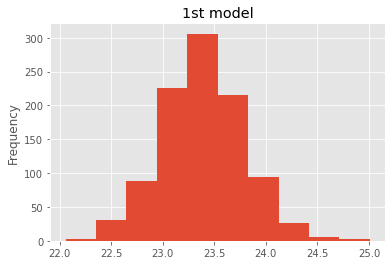

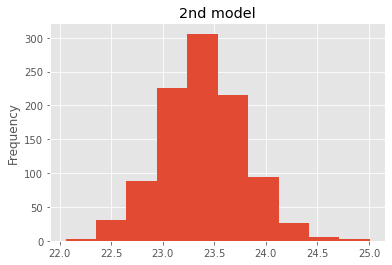

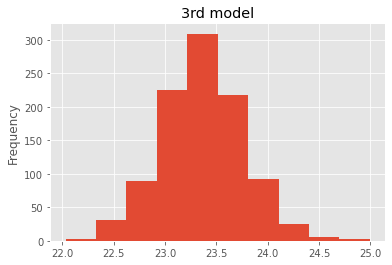

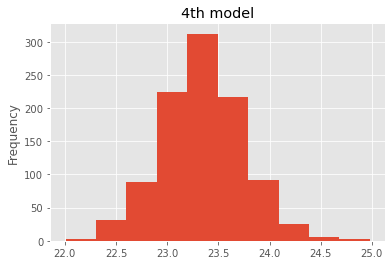

,1st,2nd,3rd,4th
Train MSE,24.197,19.0443,19.0792,18.9584
OOB MSE(mean),23.4133,23.393,23.373,23.3537
OOB MSE(var),7.69265,7.60473,7.52159,7.44259
Test MSE,,18.4548,,


In [763]:
# create different trimmed means
from scipy.stats import itemfreq
boot_trim1 = [trimmed_mean(x, 1) for x in boot_samples]
boot_trim2 = [trimmed_mean(x, 2) for x in boot_samples]
boot_trim3 = [trimmed_mean(x, 3) for x in boot_samples]
boot_trim4 = [trimmed_mean(x, 4) for x in boot_samples]
# sample each mean and std dev
trimmed_mean1 = [np.mean(x) for x in boot_trim1]
trimmed_stdev1 = [np.std(x) for x in boot_trim1]

trimmed_mean2 = [np.mean(x) for x in boot_trim2]
trimmed_stdev2 = [np.std(x) for x in boot_trim2]

trimmed_mean3 = [np.mean(x) for x in boot_trim3]
trimmed_stdev3 = [np.std(x) for x in boot_trim3]
trimmed_mean4 = [np.mean(x) for x in boot_trim4]
trimmed_stdev4 = [np.std(x) for x in boot_trim4]
# plot the means
stats=list()
bins = [x for x in range(25, 55)]
stats.append(trimmed_mean2)
pyplot.hist(stats)
oob_error(trimmed_mean1,trimmed_stdev1,0)
plt.title('1st model')
plt.ylabel('Frequency')
plt.show()

stats=[]
bins = [x for x in range(25, 55)]
frequency = [x for x in range(0, 120)]
stats.append(trimmed_mean2)
pyplot.hist(stats)
oob_error(trimmed_mean2,trimmed_stdev2,1)
plt.title('2nd model')
plt.ylabel('Frequency')
plt.show()

stats=[]
bins = [x for x in range(25, 55)]
frequency = [x for x in range(0, 120)]
stats.append(trimmed_mean3)
pyplot.hist(stats)
oob_error(trimmed_mean3,trimmed_stdev3,2)
plt.title('3rd model')
plt.ylabel('Frequency')
plt.show()

stats=[]
bins = [x for x in range(25, 55)]
frequency = [x for x in range(0, 120)]
stats.append(trimmed_mean4)
pyplot.hist(stats)
oob_error(trimmed_mean4,trimmed_stdev4,3)
plt.title('4th model')
plt.ylabel('Frequency')
plt.show()

table_OOB_20


### 3. Repeat the problem 1 and 2 using KNN model by changing K. What is the optimal K from the model selection process?

In [764]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from scipy.stats import sem

Problem1 using KNN model

In [765]:
def get_dataset():   
    X_data = X_2.iloc[:,1]
    X = X_data.values.reshape(-1,1)

    y = X_2.iloc[:,0]
    # ensure inputs are floats and output is an integer label
    #X = X.astype('float32')
    #y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

In [766]:
X, y = get_dataset()

In [669]:
X_train, y_test = X[:261], X[261:]
y_train, y_test = y[:261], y[261:]

In [728]:
k_num = 50 #1000 for real 
table_MSE_KNN = pd.DataFrame(data = [["" for _ in range(k_num)] for _ in range(5)], columns=[str(2*i + 1) for i in range(k_num)],
                         index=["Train MSE", "Validation MSE", "LOOCV MSE", "5-fold CV MSE",  "Test MSE"])
table_MSE_KNN

,1,3,5,7,9,11,13,15,17,19,...,81,83,85,87,89,91,93,95,97,99
Train MSE,,,,,,,,,,,...,,,,,,,,,,
Validation MSE,,,,,,,,,,,...,,,,,,,,,,
LOOCV MSE,,,,,,,,,,,...,,,,,,,,,,
5-fold CV MSE,,,,,,,,,,,...,,,,,,,,,,
Test MSE,,,,,,,,,,,...,,,,,,,,,,


In [729]:
# define and configure the model
def evaluate_knn(model, X, y, num):
    
    # evaluate the model
   # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=num, random_state=1) -->binary, classification에 쓰는 함수  
    n_scores = cross_val_score(model, X, y, cv=num, scoring="neg_mean_squared_error")
    return n_scores

In [781]:
repeats = range(1,k_num)
results = list()

for r in repeats:
    model = KNeighborsRegressor(2*r+1)
    #Train MSE
    model.fit(X_train, y_train)
    table_MSE_KNN.loc["Train MSE", str(2 * r + 1)] = mean_squared_error(y_train, model.predict(X_train))
    
    #Validation MSE
    model.fit(X_train, y_train)
    table_MSE_KNN.loc["Validation MSE", str(2 * r + 1)] = mean_squared_error(y_train[131:], model.predict(X_train[131:,:]))
    
    #LOOCV MSE
    scores = evaluate_knn(model, X_train, y_train, X_train.shape[0])
    table_MSE_KNN.loc["LOOCV MSE", str(2 * r + 1)] = -scores.mean()
    
    #5-fold CV MSE
    scores = evaluate_knn(lin_reg, X_train, y_train, 5)
    table_MSE_KNN.loc["5-fold CV MSE", str(2 * r + 1)] = -scores.mean()
    

In [786]:
for r in repeats:
    model = KNeighborsRegressor(2*r+1)
    model.fit(X_train,y_train)
    table_MSE_KNN.loc["Test MSE","9"]=mean_squared_error(y_test, model.predict(X_test))

In [787]:
table_MSE_KNN

,1,3,5,7,9,11,13,15,17,19,...,81,83,85,87,89,91,93,95,97,99
Train MSE,,14.0905,14.0588,14.8718,15.161,15.8754,16.2073,16.9676,17.0833,17.3239,...,22.8998,23.4178,23.9228,24.1737,24.7057,25.1781,25.8324,26.3761,26.77,27.1017
Validation MSE,,11.8949,13.4231,13.6458,11.7514,12.2251,12.4885,13.5481,13.9254,13.8448,...,22.9349,23.7616,24.5761,25.1036,26.0442,26.699,27.7008,28.4949,28.9413,29.5465
LOOCV MSE,,21.4703,19.7956,19.257,19.2601,19.4585,19.1874,18.9572,19.1749,19.0046,...,23.7581,24.3184,24.6231,25.0749,25.4478,26.0344,26.6764,27.0967,27.3914,27.7847
5-fold CV MSE,,24.9982,24.9982,24.9982,24.9982,24.9982,24.9982,24.9982,24.9982,24.9982,...,24.9982,24.9982,24.9982,24.9982,24.9982,24.9982,24.9982,24.9982,24.9982,24.9982
Test MSE,,,,,28.9693,,,,,,...,,,,,,,,,,


Problem2 using KNN model

In [772]:
k_num = 50 #1000 for real 
table_OOB_KNN = pd.DataFrame(data = [["" for _ in range(k_num)] for _ in range(4)], columns=[str(2*i + 1) for i in range(k_num)],
                         index=["Train MSE", "OOB MSE(mean)", "OOB MSE(var)", "Test MSE"])
table_OOB_KNN

,1,3,5,7,9,11,13,15,17,19,...,81,83,85,87,89,91,93,95,97,99
Train MSE,,,,,,,,,,,...,,,,,,,,,,
OOB MSE(mean),,,,,,,,,,,...,,,,,,,,,,
OOB MSE(var),,,,,,,,,,,...,,,,,,,,,,
Test MSE,,,,,,,,,,,...,,,,,,,,,,


In [773]:
repeats = range(1,k_num)
results = list()
table_OOB_KNN.iloc[0, :] = table_MSE_KNN.loc["Train MSE"].copy()
for r in repeats:
    y = auto.iloc[:,0].values
    boot_samples = [generate_samples(y, r) for _ in range(n_sets)]
    boot_trims = [trimmed_mean(x, 1) for x in boot_samples]
    # each sample mean and st. dev.
    trimmed_means = [np.mean(x) for x in boot_trims]
    trimmed_stdevs = [np.std(x) for x in boot_trims]
    table_OOB_KNN.loc["OOB MSE(mean)", str(2 * r + 1)] = trimmed_means[2 * r + 1]
    table_OOB_KNN.loc["OOB MSE(var)", str(2 * r + 1)] = trimmed_stdevs[2 * r + 1]

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [789]:
table_OOB_KNN.loc["Test MSE","9"] = table_MSE_KNN.loc["Test MSE","9"]

In [790]:
 table_OOB_KNN

,1,3,5,7,9,11,13,15,17,19,...,81,83,85,87,89,91,93,95,97,99
Train MSE,,14.0905,14.0588,14.8718,15.161,15.8754,16.2073,16.9676,17.0833,17.3239,...,22.8998,23.4178,23.9228,24.1737,24.7057,25.1781,25.8324,26.3761,26.77,27.1017
OOB MSE(mean),,NaN,NaN,22,15.75,17.6667,22.5,18.64,24.3,28.4714,...,23.7447,25.1872,23.2175,23.161,23.1405,21.7419,25.3182,24.0756,24.2043,21.5255
OOB MSE(var),,NaN,NaN,0,0.75,1.24722,3.3541,6.24006,6.052,3.89751,...,7.17744,7.46631,7.13396,6.40792,7.21949,6.11081,8.80181,6.40615,6.57052,6.84958
Test MSE,,,,,28.9693,,,,,,...,,,,,,,,,,
